#1. What are 3 areas in industry where computer vision is currently being used?



*   Reconhecimento facial
*   Reconhecimento de objetos em carros autonomos
*   Realidade Aumentada

#2. Search "what is overfitting in machine learning" and write down a sentence about what you find.


#3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.


#4. Spend 20-minutes reading and clicking through the CNN Explainer website.

-Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.


#5. Load the torchvision.datasets.MNIST() train and test datasets.


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST, FashionMNIST
import torchvision.models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device} \nPyTorch version: {torch.__version__}")

Rodando na cpu 
PyTorch version: 2.6.0+cu124


In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as t


#mnist_train = MNIST('caminho', train=True, download=True)
#mnist_test = MNIST('caminho', train=False, download=True)

prep_transform = t.Compose([t.ToTensor(),
                            t.PILToTensor(),
                            t.Normalize(0.5, 0.5, 0.5), (0.5, 0.5, 0.5)])

mnist_train = MNIST( root="caminho", # where to download data to?
    train=True,
    download=True,
    transform=t.ToTensor(),
    target_transform=None)

mnist_test = MNIST(
    root="caminho",
    train=False, # get test data
    download=True,
    transform=t.ToTensor()
)

data = '/content/drive/Mydrive/datasets/mn\ist'



In [ ]:
mnist_train.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

#6. Visualize at least 5 different samples of the MNIST training dataset.


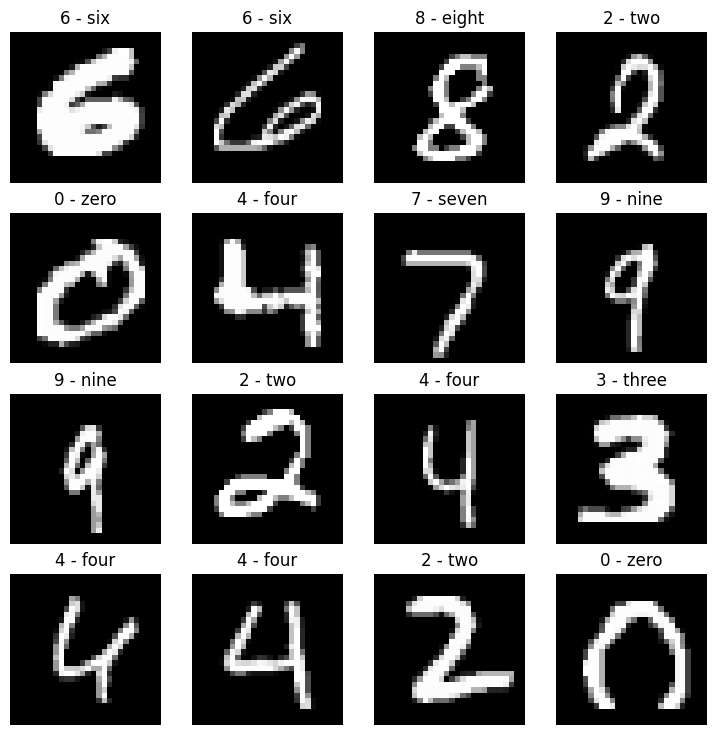

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(mnist_train), size=[1]).item()
    img, label = mnist_train[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(mnist_train.classes[label])
    plt.axis(False);

#7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.


In [ ]:
train_loader = DataLoader(mnist_train, 32, shuffle=True)
test_loader = DataLoader(mnist_test, 32, shuffle=False)


#8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.


In [ ]:
from torchvision import transforms
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
class MLPClasscifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()

    self.layers= nn.Sequential(
        nn.Linear(32 * 32 * 3, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
        nn.ReLU()
    )

  def forward(self, x):
    v = self.flatten(x)
    return self.layers(v)

In [ ]:
model = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=10).to(device)

model_cpu = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=10).to("cpu")

lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

model

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2570,  0.0493, -0.1556],
                        [ 0.0850, -0.1536, -0.0391],
                        [-0.1354,  0.2211, -0.2631]]],
              
              
                      [[[-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010],
                        [-0.2832,  0.2573,  0.0555]]],
              
              
                      [[[-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051],
                        [ 0.0896, -0.0904,  0.1403]]],
              
              
                      [[[ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693],
                        [-0.2032, -0.3300, -0.1288]]],
              
              
                      [[[-0.2557,  0.2735,  0.0960],
                        [ 0.1381,  0.1054, -0.0058],
                        [ 0.2609, -0.2368,  0.0210]]],
              
              
      

#9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.


In [ ]:
def train(model, dataloader, loss_func, optimizer, device):
  model.train()
  cumloss = 0.0

  for imgs, labels in dataloader:
    imgs, labels = imgs.to(device), labels.to(device)

    optimizer.zero_grad()

    pred = model(imgs)

    loss = lossfunc(pred, labels)
    loss.backward()
    optimizer.step()

    cumloss += loss.item()

  return cumloss / len(dataloader)

def validate(model, dataloader, loss_func):
  model.eval()
  cumloss = 0.0

  with torch.no_grad():
    for imgs, labels in dataloader:
      imgs, labels = imgs.to(device), labels.to(device)

      pred = model(imgs)
      loss = lossfunc(pred, labels)
      cumloss += loss.item()

  return cumloss / len(dataloader)

In [ ]:

epochs = 10
train_losses = []
test_losses = []

for t in range(epochs):
  train_loss = train(model, train_loader, lossfunc, optimizer, "cpu")
  train_losses.append(train_loss)
  print(f"Epoch: {t}; Train Loss: {train_loss}")

  test_loss = validate(model, test_loader, lossfunc)
  test_losses.append(test_loss)


Epoch: 0; Train Loss: 2.2994541496276857
Epoch: 1; Train Loss: 2.2986276236216225
Epoch: 2; Train Loss: 2.2971052790323894
Epoch: 3; Train Loss: 2.2934903130849205
Epoch: 4; Train Loss: 2.2736381109873456
Epoch: 5; Train Loss: 1.3221507004817328
Epoch: 6; Train Loss: 0.450448246105512
Epoch: 7; Train Loss: 0.37005926058491073
Epoch: 8; Train Loss: 0.31907369523445767
Epoch: 9; Train Loss: 0.2757909711877505


In [ ]:

epochs = 10
train_losses = []
test_losses = []

for t in range(epochs):
  train_loss = train(model, train_loader, lossfunc, optimizer, cuda)
  train_losses.append(train_loss)
  print(f"Epoch: {t}; Train Loss: {train_loss}")

  test_loss = validate(model, test_loader, lossfunc)
  test_losses.append(test_loss)


#10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.


In [ ]:
def make_confusion_matrix(model, loader, n_classes, device):
  confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int64)
  with torch.no_grad():
    for i, (imgs, labels) in enumerate(loader):
      imgs = imgs.to(device)
      labels = labels.to(device)
      outputs = model(imgs)
      _, predicted = torch.max(outputs, 1)
      for t, p in zip(torch.as_tensor(labels, dtype=torch.int64).view(-1),
                      torch.as_tensor(predicted, dtype=torch.int64).view(-1)):
        confusion_matrix[t, p] += 1
  return confusion_matrix

def evaluate_accuracy(model, dataloader, classes, verbose=True):
  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  confusion_matrix = make_confusion_matrix(model, dataloader, len(classes))
  if verbose:
    total_correct = 0.0
    total_prediction = 0.0
    for i, classname in enumerate(classes):
      correct_count = confusion_matrix[i][i].item()
      class_pred = torch.sum(confusion_matrix[i]).item()

      total_correct += correct_count
      total_prediction += class_pred

      accuracy = 100 * float(correct_count) / class_pred
      print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                    accuracy))
  print("Global acccuracy is {:.1f}".format(100 * total_correct/total_prediction))
  return confusion_matrix
def test(model, dataloader, classes):
  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}

  # again no gradients needed
  with torch.no_grad():
      for images, labels in dataloader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  # print accuracy for each class
  total_correct = 0.0
  total_prediction = 0.0
  for classname, correct_count in correct_pred.items():
      total_correct += correct_count
      total_prediction += total_pred[classname]
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                    accuracy))
  print("Global acccuracy is {:.1f}".format(100 * total_correct/total_prediction))


In [ ]:
confusion_matrix = evaluate_accuracy(model_cpu, test_loader, mnist_train.classes, "cpu")

Accuracy for class 0 - zero is: 0.0 %
Accuracy for class 1 - one is: 0.0 %
Accuracy for class 2 - two is: 0.0 %
Accuracy for class 3 - three is: 0.0 %
Accuracy for class 4 - four is: 0.0 %
Accuracy for class 5 - five is: 0.0 %
Accuracy for class 6 - six is: 0.0 %
Accuracy for class 7 - seven is: 100.0 %
Accuracy for class 8 - eight is: 0.0 %
Accuracy for class 9 - nine is: 0.0 %
Global acccuracy is 10.3


#11. Plot a confusion matrix comparing your model's predictions to the truth labels.


<Axes: >

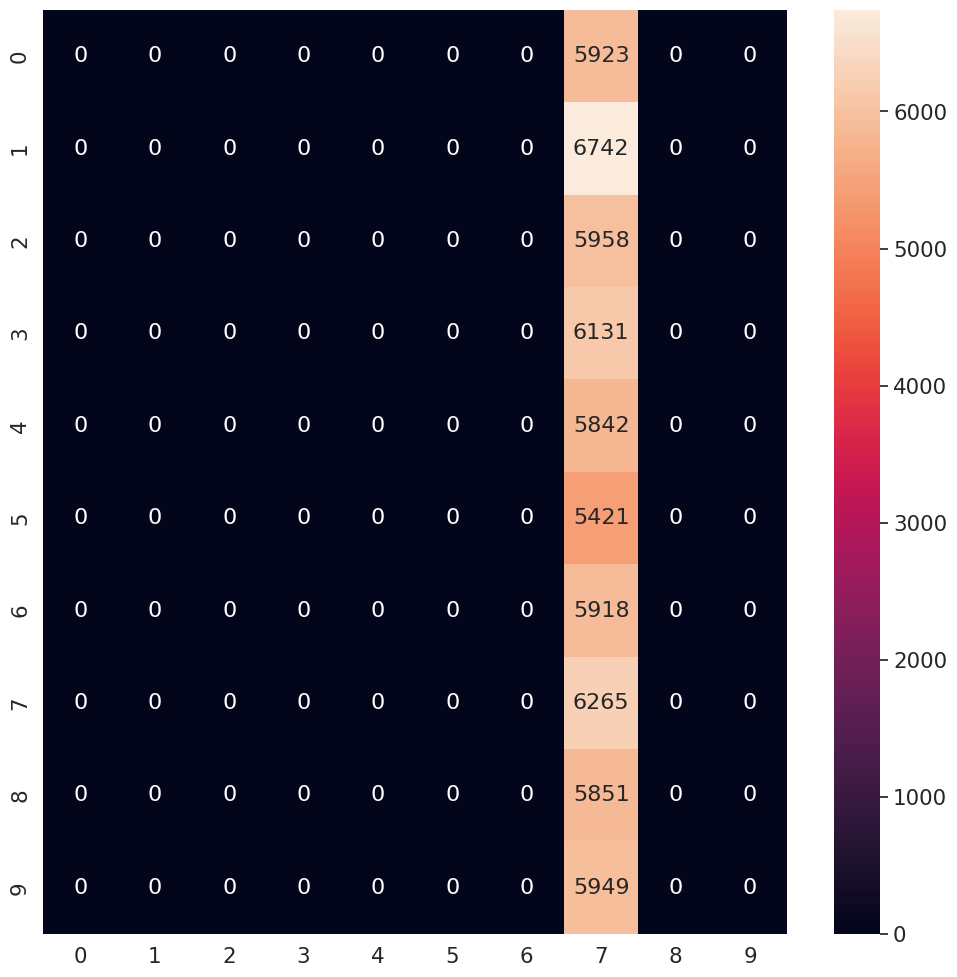

In [ ]:
import seaborn as sn

plt.figure(figsize=(12, 12))
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix.tolist(),
           annot=True, annot_kws={"size": 16}, fmt='d')

#12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?


In [ ]:
r = torch.randn(1, 3, 64, 64)

r.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {r.shape}")
r_conv_layer = conv_layer(r)
print(f"Random tensor through conv layer shape: {r_conv_layer.shape}")


Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


#13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.

-Then plot some predictions where the model was wrong alongside what the label of the image should've been.

-After visualizing these predictions do you think it's more of a modelling error or a data error?

-As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?


In [ ]:
import torchvision.transforms as t

train_fashion_data = torchvision.datasets.FashionMNIST(root='caminho',
                                                       train= True,
                                                       download=True,
                                                       transform=t.ToTensor(),
                                                       target_transform=None)

test_fashion_data = torchvision.datasets.FashionMNIST(root='caminho',
                                                       train= False,
                                                       download=True,
                                                       transform=t.ToTensor(),
                                                       target_transform=None)


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 199kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]


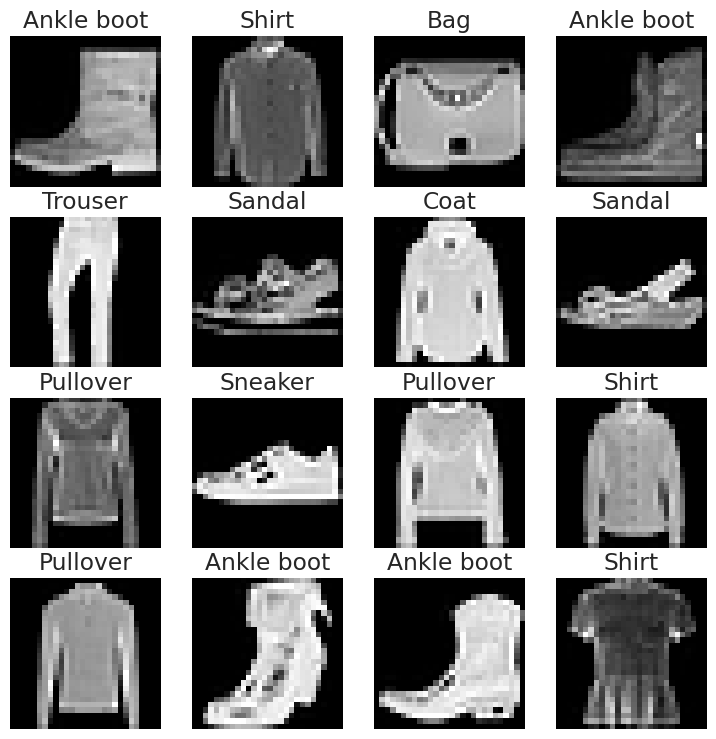

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_fashion_data), size=[1]).item()
    img, label = train_fashion_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_fashion_data.classes[label])
    plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader

train_fashion_dataloader = DataLoader(train_fashion_data, batch_size=32, shuffle=True)

test_fashion_dataloader = DataLoader(test_fashion_data, batch_size=32, shuffle=False)



In [ ]:
train_features_batch, train_labels_batch = next(iter(train_fashion_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
model_n = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10).to(device)